<a href="https://colab.research.google.com/github/reallylongaddress/Kaggle/blob/main/playground-series-s3e2/playground_series_s3e2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

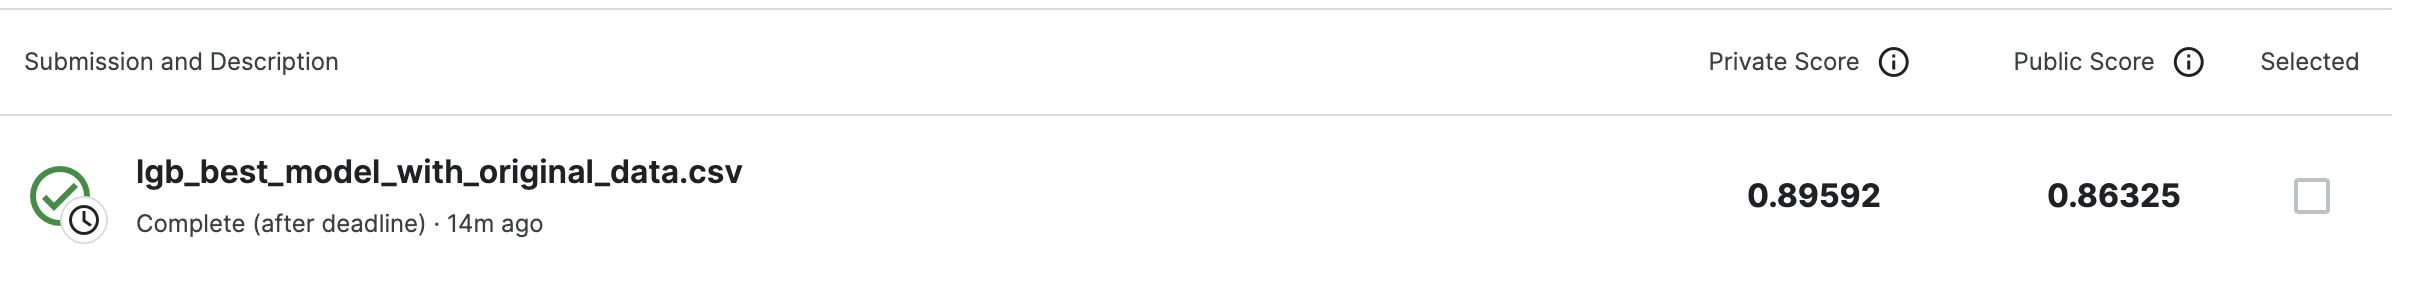

# Setup

In [6]:
import os
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.model_selection import train_test_split

# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [7]:
from sklearn import set_config
set_config(display='diagram')
# set_config(transform_output="pandas")

In [8]:
data_path = ''

#kaggle
if (os.environ.get('KAGGLE_KERNEL_RUN_TYPE','')) or (os.environ.get('KAGGLE_KERNEL_RUN_TYPE','') == 'Interactive') or (os.environ.get('KAGGLE_KERNEL_RUN_TYPE','') == 'Batch'):
    print("Kaggle")  
    data_path = '/kaggle/input'    
    
#google colab
elif 'google.colab' in sys.modules:
    print('Google Colab')

    from google.colab import drive
    
    drive = drive.mount('/content/drive/')
    data_path = f'/content/drive/My Drive/Colab_Data/kaggle/playground-series-s3e2'
    
#localhost
elif os.environ.get('KAGGLE_KERNEL_RUN_TYPE','') == '':
    print('Localhost')
    data_path = './data'
    

Google Colab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/My Drive/Colab_Data/kaggle/playground-series-s3e2/healthcare-dataset-stroke-data.csv
/content/drive/My Drive/Colab_Data/kaggle/playground-series-s3e2/train.csv
/content/drive/My Drive/Colab_Data/kaggle/playground-series-s3e2/test.csv
/content/drive/My Drive/Colab_Data/kaggle/playground-series-s3e2/xgb_best_model_with_original_data.csv
/content/drive/My Drive/Colab_Data/kaggle/playground-series-s3e2/lgb_best_model_with_original_data.csv
/content/drive/My Drive/Colab_Data/kaggle/playground-series-s3e2/lgb_best_model_no_original_data.csv
/content/drive/My Drive/Colab_Data/kaggle/playground-series-s3e2/xgb_best_model_no_original_data.csv
/content/drive/My Drive/Colab_Data/kaggle/playground-series-s3e2/xgb_best_model.csv
/content/drive/My Drive/Colab_Data/kaggle/playground-series-s3e2/lgb_best_model_original_data_boxcox.csv
/content/drive/My Drive/Colab_Data/kaggle/playground-series-s3e2/baseline_output.csv
/content/drive/My Drive/Colab_Data/kaggle/playground-series-s3e2/lgb_

In [10]:
# from sklearn.preprocessing import PowerTransformer

def load_dataframes(merge_original=True):
  # power = PowerTransformer(method='box-cox', standardize=True)
  
  train_val_df = pd.read_csv(f'{data_path}/train.csv')

  score_df = pd.read_csv(f'{data_path}/test.csv')

  original_df = pd.read_csv(f'{data_path}/healthcare-dataset-stroke-data.csv')

  if merge_original:
    train_val_df = pd.concat([train_val_df, original_df])
    train_val_df = train_val_df.dropna()

  train_val_df.shape, score_df.shape, original_df.shape  
  return train_val_df, original_df, score_df;


def get_encoded_dataframes():

  train_df, original_df, score_df = load_dataframes()

  X_train_df = train_df.copy().drop(columns=['stroke'])
  y_train_df = (train_df.copy()[['stroke']]).astype(int)
  X_score_df = score_df.copy()
  # print(f'1: {train_df.dtypes}')

  scale_encode_transformer.fit(X_train_df)
  X_train_df_2 = pd.DataFrame(scale_encode_transformer.transform(X_train_df), columns=scale_encode_transformer.get_feature_names_out())
  X_score_df_2 = pd.DataFrame(scale_encode_transformer.transform(X_score_df), columns=scale_encode_transformer.get_feature_names_out())
  # print(f'2: {X_train_df_2.dtypes}')

  smoker_transformer.fit(X_train_df_2)
  X_train_df_3 = pd.DataFrame(smoker_transformer.transform(X_train_df_2), columns=smoker_transformer.get_feature_names_out())
  X_score_df_3 = pd.DataFrame(smoker_transformer.transform(X_score_df_2), columns=smoker_transformer.get_feature_names_out())
  # print(f'3: {X_train_df_3.dtypes}')

  X_train, X_test, y_train, y_test = train_test_split(X_train_df_3, y_train_df, test_size=0.2, random_state=42)
  # print(f'columns******:{X_train.columns}')
  # print(f'columns******:{X_score_df_3.columns}')

  df_dtypes_dict = {'work_type_Govt_job': 'int', 'work_type_Never_worked': 'int', 'work_type_Private': 'int', 'work_type_Self-employed': 'int',
                  'work_type_children': 'int', 'gender_Female': 'int', 'gender_Male': 'int', 'gender_Other': 'int', 
                  'hypertension_1': 'int', 'heart_disease_1': 'int', 'ever_married_Yes': 'int', 'Residence_type_Urban': 'int', 'id': 'int',
                  'smoking_flag':'float', 'avg_glucose_level':'float', 'age':'float', 'bmi':'float'}

  X_train = X_train.astype(df_dtypes_dict)
  X_test = X_test.astype(df_dtypes_dict)
  X_score_df_3 = X_score_df_3.astype(df_dtypes_dict)
  # X_score_df_3 = X_score_df_3.set_index('id')
  
  return X_train, X_test, y_train, y_test, X_score_df_3


In [12]:
# X_train, X_test, y_train, y_test, X_score_df_encoded = get_encoded_dataframes()
# print('--'*10)
# X_train.dtypes

In [13]:
# original_df


## EDA

In [14]:
# NUM_FEATURES = ['age', 'avg_glucose_level', 'bmi']#[c for c in df_train.columns if c not in [TARGET]]
# TARGET = 'stroke'
# ncols = 3
# nrows = np.ceil(len(NUM_FEATURES)/ncols).astype(int)
# fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,nrows*4))
# for c, ax in zip(NUM_FEATURES, axs.flatten()):
#     # sns.kdeplot(data=train_df, x=c, ax=ax, label='train')
#     sns.kdeplot(data=score_df, x=c, ax=ax, label='score')
#     sns.kdeplot(data=original_df, x=c, ax=ax, label='original')
#     ax.legend(loc='upper right', prop={'size': 10})

# fig.suptitle('Distribution of numerical features')
# plt.tight_layout(rect=[0, 0, 1, 0.98])

In [15]:
# def plot_features_by_target(df, num_features):
#     """Display all columns in df except TARGET group by TARGET.
#     """
#     saved_type = df[TARGET].dtype
#     df[TARGET] = df[TARGET].astype('category')
#     columns = num_features#[c for c in df.columns if c != TARGET]
#     ncols = 3
#     nrows = np.ceil(len(columns)/ncols).astype(int)
#     print(f'ncols/nrows: {ncols}/{nrows}')
#     fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,nrows*4))
#     for c, ax in zip(columns, axs.flatten()):
#         if c in num_features:
#             print(f'boxplot: {c}')
#             sns.boxplot(data=df, x=c, y=TARGET, ax=ax)
#         else:
#             print(f'countplot: {c}')
#             sns.countplot(data=df, x=c, hue=TARGET, ax=ax)
#     fig.suptitle('Distribution of variables grouped by the target variable', fontsize=20)
#     plt.tight_layout(rect=[0, 0, 1, 0.98])
#     df[TARGET] = df[TARGET].astype(saved_type)
    
# plot_features_by_target(train_df, NUM_FEATURES)

In [16]:
# plt.figure(figsize=(10,3))
# plt.subplot(1,3,1)
# sns.histplot(train_df["age"])
# plt.subplot(1,3,2)
# g1=sns.histplot(train_df["avg_glucose_level"],kde=True)
# g1.set(ylabel=None)
# plt.subplot(1,3,3)
# g1=sns.histplot(train_df["bmi"],kde=True)
# g1.set(ylabel=None)
# plt.show()

In [17]:
# def calc_skew_kurtosis(num_features):
#   print(f'calc_skew_kurtosis({num_features})')
#   skew_values = []
#   kurtosis_values = []

#   for feature in num_features:

#     skew_values.append(train_df[feature].skew())
#     kurtosis_values.append(train_df[feature].kurt())

#   print(f': {len(skew_values)}')
#   print(f': {len(kurtosis_values)}')
  
#   skew_kurt_df = pd.DataFrame({'skew':np.abs(skew_values), 'kurtosis':np.abs(kurtosis_values), 'feature_name':num_features})
#   skew_kurt_df.sort_values(by='skew', ascending=False).head(6)

#   features_with_skew = ((skew_kurt_df[skew_kurt_df['skew'] > .99])['feature_name']).tolist()
#   features_with_kurtosis  = ((skew_kurt_df[skew_kurt_df['kurtosis'] > .99])['feature_name']).tolist()

#   print(f'features_with_skew: {features_with_skew}') 
#   print(f'features_with_kurtosis: {features_with_kurtosis}')
#   display(skew_kurt_df.sort_values(by='kurtosis', ascending=False).head(5))

# calc_skew_kurtosis(NUM_FEATURES)

NameError: ignored

In [35]:
# NUM_FEATURES_2 = NUM_FEATURES.copy()
# NUM_FEATURES_2.append('log_avg_glucose_level')
# train_df['log_avg_glucose_level'] = np.log(train_df['avg_glucose_level'])

# NUM_FEATURES_2.append('boxcox_avg_glucose_level')
# train_df['boxcox_avg_glucose_level'] = boxcox(train_df['avg_glucose_level'])[0]

# # train_df

# print(f'NUM_FEATURES_2: {NUM_FEATURES_2}')
# calc_skew_kurtosis(NUM_FEATURES_2)

## Preprocessing


In [36]:
# !pip install scikit-learn==1.2.1

In [37]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin

pd.set_option('display.max_columns', None)

train_df, test_df, original_df = load_dataframes()
verbose_pipeline = False


class SmokingFeatureEngineering(BaseEstimator, TransformerMixin):

  def __init__(self):
    pass

  def transform(self,X,y=None):

    X_temp = X.copy()

    experiment_number = 1

    # smoking_status_Unknown	
    # smoking_status_formerly smoked
    # smoking_status_never smoked
    # smoking_status_smokes

    if experiment_number == 1:
      # print(f'a experiment_number: {experiment_number}')

      #0 if never, 1 if unknown, 2 if current or former
      X_temp['smoking_flag'] = [0 if x=='never smoked' else 1 if x=='Unknown' else 2 for x in X_temp['smoking_status']]
      X_temp['smoking_flag'] = StandardScaler().fit_transform(X_temp[['smoking_flag']])
      X_temp = X_temp.drop(columns='smoking_status')

      self.columns = X_temp.columns
    # knnimputer fill 'smoked_unknown'
    elif experiment_number == 2:
      print(f'experiment_number: {experiment_number}')
      pass
    
    return X_temp
    
  def fit(self, X, y=None):
    self.columns = X.columns
    return self   

  def get_feature_names_out(self, arg):
    return self.columns


scale_encode_transformer = ColumnTransformer(
                            [
                              ('scale_numerics', StandardScaler(), ['age', 'bmi', 'avg_glucose_level']),
                              ('oh_encoder', OneHotEncoder(drop='if_binary'), ['work_type', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type']),
                            ],
                            remainder='passthrough',
                            verbose_feature_names_out=False,
                            verbose=verbose_pipeline
                            )

smoker_transformer = ColumnTransformer(
                      [
                        ('smoker_feature_engineering', SmokingFeatureEngineering(), ['smoking_status'])
                      ],
                      remainder='passthrough',
                      verbose_feature_names_out=False,
                      verbose=verbose_pipeline
                      )

# scale_encode_transformer, smoker_transformer

In [38]:
import sklearn
sklearn.__version__

'1.2.1'

## Baseline Model

In [39]:
X_train, X_test, y_train, y_test, X_score_df_encoded = get_encoded_dataframes()
X_train.head(20)

,smoking_flag,age,bmi,avg_glucose_level,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Female,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,Residence_type_Urban,id
8247,-1.079023,-1.416155,-0.085775,0.053246,0,0,0,0,1,0,1,0,0,0,0,1,8247
8237,1.326436,0.700993,-0.100017,-0.365545,0,0,1,0,0,1,0,0,0,0,0,0,8237
7231,-1.079023,0.839067,0.085126,0.214248,0,0,1,0,0,1,0,0,0,0,1,1,7231
16982,0.123706,-0.909881,-0.427578,-1.065931,0,0,1,0,0,0,1,0,0,0,0,0,39450
11591,0.123706,-1.738330,-1.524196,0.159119,0,0,0,0,1,0,1,0,0,0,0,0,11591
10289,0.123706,-1.846949,-1.068459,-0.804696,0,0,0,0,1,1,0,0,0,0,0,0,10289
15726,1.326436,1.253292,-0.213951,0.267184,0,0,1,0,0,0,1,0,0,0,1,0,621
900,1.326436,0.516893,-0.327886,-0.111514,0,0,1,0,0,1,0,0,0,0,1,1,900
17961,1.326436,1.667516,-0.100017,1.581192,1,0,0,0,0,0,1,0,0,0,1,1,54371
934,1.326436,-0.265531,0.825699,-0.326391,0,0,1,0,0,0,1,0,0,0,1,0,934


In [40]:

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Split the data into features and target
# print(train_df_encoded.shape)
tr_X = X_train.copy().drop(columns=['id'])
tr_y = (y_train.copy()[['stroke']]).astype(int)
# tr_y = tr_y.reset_index()
# display(tr_y)

# Define the k-fold cross validation object
kf = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

# # Initialize a logistic regression model
model = LogisticRegression()

# Initialize a list to store the AUC scores for each fold
auc_scores = []
best_model = None

# Loop over each fold of the k-fold cross validation
for train_index, test_index in kf.split(tr_X, tr_y):

  _X_train, _X_test = (tr_X.to_numpy())[train_index], (tr_X.to_numpy())[test_index]
  # _y_train, _y_test = tr_y[train_index], tr_y[test_index]
  _y_test = tr_y.to_numpy()[test_index]
  _y_train = pd.DataFrame(tr_y.to_numpy()[train_index])
    
  # Fit the model on the training data
  model.fit(_X_train, _y_train.values.ravel())

  # Predict the probability of having a stroke on the test data
  _y_prob = model.predict_proba(_X_test)[:,1]
  
  # Compute the AUC score on the test data
  auc_score = roc_auc_score(_y_test, _y_prob)
  auc_scores.append(auc_score)
  # print(f'({auc_score} > {max(auc_scores)}')

  if (best_model is None) or (auc_score == max(auc_scores)):
    # print(f'auc_score: {auc_score}')
    best_model = model
    
# Compute the average AUC score across all folds
average_auc = np.mean(auc_scores)
print(f'max/min/ave: {round(max(auc_scores), 3)}/{round(min(auc_scores), 3)}/{round(average_auc, 3)}')

max/min/ave: 0.907/0.828/0.874


In [41]:
# display(X_score_df_encoded)
X_score_df_encoded_2 = X_score_df_encoded.drop(columns='id')
probabilities = best_model.predict_proba(X_score_df_encoded_2)[:,1]

y_prob = pd.DataFrame({'id':X_score_df_encoded['id'], 'stroke':probabilities})

y_prob.to_csv(f'{data_path}/baseline_output.csv', index=False)

y_prob.head()

#Private Score: 0.89324
#Public Score: 0.86862


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,id,stroke
0,15304,0.042190
1,15305,0.152704
2,15306,0.000194
3,15307,0.040523
4,15308,0.006550


## Compare some models

In [42]:
# train_df, original_df, score_df = load_dataframes()

# X_train_df = train_df.copy().drop(columns=['stroke'])
# print(f'dbd debug a')
# y_train_df = (train_df.copy()[['stroke']]).astype(int)
# # X_train_df_encoded = pd.DataFrame(scale_encode_transformer.fit_transform(X_train_df), columns = scale_encode_transformer.get_feature_names_out())
# X_train_df_encoded = pd.DataFrame(full_pipeline.fit_transform(X_train_df), columns = full_pipeline.get_feature_names_out())

# X_train, X_test, y_train, y_test = train_test_split(X_train_df_encoded, y_train_df, test_size=0.2, random_state=42)

# X_score_df = score_df.copy()
# X_score_df_encoded = pd.DataFrame(full_pipeline.transform(X_score_df), columns = full_pipeline.get_feature_names_out())
# # X_score_df_encoded = pd.DataFrame(scale_encode_transformer.transform(X_score_df), columns = scale_encode_transformer.get_feature_names_out())
# X_score_df_encoded.index = (X_score_df_encoded['id'].astype(int))
# X_score_df_encoded = X_score_df_encoded.drop(columns='id')


In [43]:
# from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# # from xgboost.sklearn import XGBClassifier
# from lightgbm import LGBMClassifier

# # Define a list of the classifiers to be compared
# classifiers = [
#     LogisticRegression(max_iter=500),
#     RandomForestClassifier(n_estimators=1500),
#     XGBClassifier(),
#     KNeighborsClassifier(),
#     LGBMClassifier()
# ]

# # Train each classifier and calculate its AUC-ROC on the test set
# for clf in classifiers:
#     clf.fit(X_train, y_train.values.ravel())
#     y_pred = clf.predict_proba(X_test)[:, 1]
#     auc = roc_auc_score(y_test, y_pred)
#     print("{}: AUC-ROC = {:.3f}".format(clf.__class__.__name__, auc))

In [44]:
# # Define a list of the classifiers to be compared
# classifiers = [
#     LogisticRegression(max_iter=500),
#     RandomForestClassifier(n_estimators=500),
#     XGBClassifier(),
#     KNeighborsClassifier(),
#     LGBMClassifier()
# ]

# # Define the number of folds for cross-validation
# k = 5

# # Initialize a StratifiedKFold object with the number of folds
# skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# # Train each classifier and calculate its average AUC-ROC over the folds
# for clf in classifiers:
#     aucs = []
#     # for train_index, test_index in skf.split(X, y):
#     for train_index, test_index in skf.split(X_train_df, y_train_df):
#         X_train, X_test = X_train_df_encoded.iloc[train_index], X_train_df_encoded.iloc[test_index]
#         y_train, y_test = y_train_df.iloc[train_index], y_train_df.iloc[test_index]
#         clf.fit(X_train, y_train.values.ravel())
#         y_pred = clf.predict_proba(X_test)[:, 1]
#         auc = roc_auc_score(y_test, y_pred)
#         aucs.append(auc)
#     print("{}: AUC-ROC = {:.3f} (+/- {:.3f})".format(clf.__class__.__name__, np.mean(aucs), np.std(aucs)))

In [45]:
X_train, X_test, y_train, y_test, X_score = get_encoded_dataframes()

# X_train.columns, X_score.columns

(Index(['smoking_flag', 'age', 'bmi', 'avg_glucose_level', 'work_type_Govt_job',
        'work_type_Never_worked', 'work_type_Private',
        'work_type_Self-employed', 'work_type_children', 'gender_Female',
        'gender_Male', 'gender_Other', 'hypertension_1', 'heart_disease_1',
        'ever_married_Yes', 'Residence_type_Urban', 'id'],
       dtype='object'),
 Index(['smoking_flag', 'age', 'bmi', 'avg_glucose_level', 'work_type_Govt_job',
        'work_type_Never_worked', 'work_type_Private',
        'work_type_Self-employed', 'work_type_children', 'gender_Female',
        'gender_Male', 'gender_Other', 'hypertension_1', 'heart_disease_1',
        'ever_married_Yes', 'Residence_type_Urban', 'id'],
       dtype='object'))

In [46]:
X_train, X_test, y_train, y_test, X_score = get_encoded_dataframes()

X_score = X_score.set_index('id')
X_score.head()
# dtypes = [float, float, float, int, int, int, int, ]

,smoking_flag,age,bmi,avg_glucose_level,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Female,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,Residence_type_Urban
id,,,,,,,,,,,,,,,,
15304,0.146637,0.700993,0.726006,-0.327331,0,0,1,0,0,1,0,0,0,0,1,0
15305,0.146637,1.299317,0.028159,-0.655598,0,0,1,0,0,0,1,0,1,0,1,1
15306,0.146637,-1.692305,-1.253602,0.336095,0,0,0,0,1,1,0,0,0,0,0,1
15307,1.347507,0.654968,1.865349,-0.743929,1,0,0,0,0,1,0,0,0,0,1,1
15308,1.347507,-0.449631,0.256027,0.568826,0,0,1,0,0,0,1,0,0,0,1,0


In [47]:
X_train, X_test, y_train, y_test, X_score = get_encoded_dataframes()

import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score

# Split the data into features and target
X = X_train.drop(columns="id")
y = y_train#data["target"]


# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Define the XGBClassifier model
xgb = XGBClassifier(random_state=0)

# Define the hyperparameter search space for XGBClassifier
xgb_params = {
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [4, 6],
    "n_estimators": [200, 300, 400],
    "subsample": [0.9, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0.01, 0.1]
}

# Perform random search on XGBClassifier
xgb_rs = RandomizedSearchCV(xgb, param_distributions=xgb_params, n_iter=10, cv=cv, scoring="roc_auc", random_state=0, verbose=2, n_jobs=-1)
xgb_rs.fit(X, y.values.ravel())

# Define the LGBMClassifier model
lgb = LGBMClassifier(random_state=0)

# Define the hyperparameter search space for LGBMClassifier
lgb_params = {
    "learning_rate": [0.05, 0.1, 1],
    "max_depth": [2, 3],
    "n_estimators": [100, 200, 300],
    "subsample": [0.01, 0.05, 0.1],
    "colsample_by_tree": [0.01, .1, .3],
    "reg_alpha": [0.5, .75, 1.0],
    "reg_lambda": [0, 0.01, 0.1]
}

# Perform random search on LGBMClassifier
lgb_rs = RandomizedSearchCV(lgb, param_distributions=lgb_params, n_iter=20, cv=cv, scoring="roc_auc", random_state=0, verbose=2, n_jobs=-1)
lgb_rs.fit(X, y.values.ravel())

# Compare the results of the best models from each classifier
print("Best XGBClassifier score: ", xgb_rs.best_score_)
print("Best XGBClassifier params: ", xgb_rs.best_params_)
print("Best LGBMClassifier score: ", lgb_rs.best_score_)
print("Best LGBMClassifier params: ", lgb_rs.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best XGBClassifier score:  0.8771423179851663
Best XGBClassifier params:  {'subsample': 1.0, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.01, 'colsample_bytree': 0.8}
Best LGBMClassifier score:  0.8783461429303904
Best LGBMClassifier params:  {'subsample': 0.05, 'reg_lambda': 0.01, 'reg_alpha': 1.0, 'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.1, 'colsample_by_tree': 0.01}


In [48]:
lgb_best_model = lgb_rs.best_estimator_
X = X_test.drop(columns="id")
X_sc = X_score.drop(columns="id")
y_pred = lgb_best_model.predict_proba(X)[:,1]
  
  # Compute the AUC score on the test data
auc_score = roc_auc_score(y_test, y_pred)
print(f'val auc_score: {auc_score}')

probabilities = lgb_best_model.predict_proba(X_sc)[:,1]
y_prob = pd.DataFrame({'id':X_score['id'], 'stroke':probabilities})

y_prob.to_csv(f'{data_path}/lgb_best_model.csv', index=False)

val auc_score: 0.8738052182898476


In [49]:
xgb_best_model = xgb_rs.best_estimator_
X = X_test.drop(columns="id")
X_sc = X_score.drop(columns="id")
y_pred = xgb_best_model.predict_proba(X)[:,1]
  
  # Compute the AUC score on the test data
auc_score = roc_auc_score(y_test, y_pred)
print(f'val auc_score: {auc_score}')

probabilities = xgb_best_model.predict_proba(X_sc)[:,1]
y_prob = pd.DataFrame({'id':X_score['id'], 'stroke':probabilities})

y_prob.to_csv(f'{data_path}/xgb_best_model.csv', index=False)

val auc_score: 0.8666155010723748
